In [1]:
import os
import glob
import math
import uproot
import numpy as np
import tensorflow as tf



gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("Available GPU devices:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU devices found.")

# Set the environment variables
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/opt/cuda/'

cuda_path = '/opt/cuda/'

os.environ['CUDA_HOME'] = cuda_path

# Update PATH environment variable
os.environ['PATH'] = cuda_path + 'bin:' + os.environ.get('PATH', '')

# Update CPATH environment variable
os.environ['CPATH'] = cuda_path + 'include:' + os.environ.get('CPATH', '')

# Update LIBRARY_PATH environment variable
os.environ['LIBRARY_PATH'] = cuda_path + 'cuda/lib64:' + os.environ.get('LIBRARY_PATH', '')

# Update LD_LIBRARY_PATH environment variable
os.environ['LD_LIBRARY_PATH'] = cuda_path + f'lib64:{cuda_path}extras/CUPTI/lib64:' + os.environ.get('LD_LIBRARY_PATH', '')



2024-05-18 13:49:08.457378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 13:49:08.457422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 13:49:08.475847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 13:49:08.507823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 13:49:09.576215: W tensorflow/compiler/tf2

Available GPU devices:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-05-18 13:49:12.136322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 13:49:12.347482: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 13:49:12.347784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Flatten, Dense, Input, Concatenate, Dropout


input_shape_conv = (50, 50, 50, 1)
additional_input_shape = (1,)

model = tf.keras.Sequential([
    Conv3D(64, (5, 5, 5), activation='relu', input_shape=input_shape_conv),
    Conv3D(32, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    
    Conv3D(32, (3, 3, 3), activation='relu'),
    Conv3D(32, (3, 3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    
    Conv3D(32, (3, 3, 3), activation='relu'),
    Conv3D(6, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    
    Flatten(),
])

additional_input = Input(shape=additional_input_shape)
concatenated_output = Concatenate()([model.output, additional_input])
fc_output = Dense(512, activation='relu')(concatenated_output)
fc_output = Dense(128, activation='relu')(fc_output)
fc_output = Dense(32, activation='relu')(fc_output)
fc_output = Dropout(0.2)(fc_output)

fem_prediction = Dense(1, activation='sigmoid', name='fem_output')(fc_output)

# Output layer for energy prediction
# energy_prediction = Dense(1, activation='linear', name='energy_output')(fc_output)


final_model = tf.keras.Model(inputs=[model.input, additional_input], outputs=fem_prediction)

# final_model = tf.keras.Model(inputs=[model.input, additional_input], outputs=[fem_prediction, energy_prediction])

# Print model summary
final_model.summary()

# Compile the model
final_model.compile(optimizer='adam', loss="mean_squared_error", metrics=['mape','mse', 'mae'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv3d_input (InputLayer)   [(None, 50, 50, 50, 1)]      0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 46, 46, 46, 64)       8064      ['conv3d_input[0][0]']        
                                                                                                  
 conv3d_1 (Conv3D)           (None, 44, 44, 44, 32)       55328     ['conv3d[0][0]']              
                                                                                                  
 max_pooling3d (MaxPooling3  (None, 22, 22, 22, 32)       0         ['conv3d_1[0][0]']            
 D)                                                                                           

2024-05-18 13:51:03.388939: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 13:51:03.389220: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 13:51:03.389395: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
import re

class CustomSequence(tf.keras.utils.Sequence):
    def __init__(self, sample_paths, batch_size):
        self.sample_paths = sample_paths
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.sample_paths) / self.batch_size)

    def __getitem__(self, idx):
        low = idx * self.batch_size
        high = min(low + self.batch_size, len(self.sample_paths))
        sample_batch = self.sample_paths[low:high]

        x_shower_batch = []
        x_energy_batch = []
        y_fem_batch = []
        # y_energy_batch = []

        for sample in sample_batch:
            with uproot.open(sample["file_path"]) as f:
                fem_values = f["fem_evt"].values()
                energy_values  = f['energy_evt'].values()

            hist = f[f'pos/pos_{sample["hist_index"]}']
            
            max_value = np.max(hist.values())
            if max_value != 0:
                fem = round(fem_values[sample["hist_index"]], 3)
                energy = round(energy_values[sample["hist_index"]], 3)
                normalized_hist = np.array(hist.values() / max_value, dtype=np.float32)
            else:
                fem = 0
                energy = 0
                normalized_hist = np.zeros(hist.values().shape, dtype=np.float32)
            
            # pattern = r'\d+\.\d+'
            # match = re.search(pattern, sample["file_path"])

            x_shower_batch.append(normalized_hist)
            x_energy_batch.append(energy)
            y_fem_batch.append(fem)
            # y_energy_batch.append(float(match.group()))


        # Convert lists to numpy arrays
        x_shower_batch = np.array(x_shower_batch, dtype=np.float32)
        x_energy_batch = np.array(x_energy_batch, dtype=np.float32)
        y_fem_batch = np.array(y_fem_batch, dtype=np.float32)
        # y_energy_batch = np.array(y_energy_batch, dtype=np.float32)
        
        # Construct x_batch as a tuple
        x_batch = (x_shower_batch, x_energy_batch)
        # y_batch = (y_fem_batch, y_energy_batch)
        y_batch = y_fem_batch
        
        return x_batch, y_batch

In [4]:
# from tensorflow.keras.callbacks import Callback
batch_size = 16
file_pattern = "../ssh_data/*_ready.root"

file_list = glob.glob(file_pattern)[:900]
# print(file_list)
expanded_file_list = []
for file in file_list:
    for index in range(1000):
        expanded_file_list.append({"file_path": file,"hist_index": index})

# Split your file list into training and validation sets
split_index = int(len(expanded_file_list) * 0.7)
train_files = expanded_file_list[:split_index]
val_files = expanded_file_list[split_index:]

# Create instances of the CustomSequence class for training and validation
train_sequence = CustomSequence(train_files, batch_size)
val_sequence = CustomSequence(val_files, batch_size)

# Train your model using fit method and include the callback
history = final_model.fit(train_sequence,
                epochs=3,
                validation_data=val_sequence)
                # Save the trained model
# final_model.save('mse_ssh_sigmoid_3epoch_full.h5')


In [5]:
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('ssh_sigmoid_2epoch_full.h5')

# for val in dir(model)[200:]:
#     print(val)
# print(model.)

# Continue training for additional epochs
history = model.fit(train_sequence, validation_data=val_sequence, epochs=3, initial_epoch=2)

# Save the model again after additional training
model.save('ssh_sigmoid_3epoch_full.h5')

Epoch 3/3


2024-05-18 13:51:23.804014: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-18 13:51:29.751734: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f82d09c77a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-18 13:51:29.751765: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-05-18 13:51:29.757579: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716029489.829407   14686 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39375/39375 [==============================] - 22665s 575ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0531 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1624


/home/padniuk/Desktop/cnn_data_generation/network/env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras.models import load_model

file_pattern = "../old_data/*_ready.root"
x_index = []
y_cnn_output_fem = []
y_ccn_output_energy = []
y_actual_fem = []
y_delta_fem = []
energies_meas = []
energies_true = []
y_delta_energy = []
# print(glob.glob(file_pattern))
# pattern = r'\d+\.\d+'
# for it, file_path in enumerate(glob.glob(file_pattern)):
#     match = float(re.search(pattern, file_path).group())
#     if 9.5 < match < 10.5:
#         print(it, file_path)

file_index = 937 #454 10GeV #14 145gev 

print(glob.glob(file_pattern)[file_index:file_index+1][0])
for index in range(1000):
    file_path = glob.glob(file_pattern)[file_index:file_index+1][0]
    with uproot.open(file_path) as f:
        hist = f[f'pos/pos_{index}']
        fem_value = f["fem_evt"].values()[index]
        energy = f['energy_evt'].values()[index]

    energies_meas.append(energy)
    pattern = r'\d+\.\d+'
    match = re.search(pattern, file_path)
    # print(match.group())
    energies_true.append(float(match.group()))
        

    # Preprocess the histogram values by normalizing them
    max_value = np.max(hist.values())
    if max_value != 0:
        normalized_hist = np.array(hist.values() / max_value, dtype=np.float32)
    else:
        normalized_hist = np.zeros(hist.values().shape, dtype=np.float32)

    # Prepare the input data for the model
    input_shower = np.array([normalized_hist])
    input_shower = input_shower.reshape((1,) + input_shape_conv)

    input_energy = energy
    # Use the model's predict() method to obtain the predicted output
    model = load_model('ssh_sigmoid_2epoch_full.h5')
    predicted_output = model.predict([input_shower, np.array([input_energy])])

    # Compare the predicted output with the actual number
    # print(f"Index {index}, Actual Number: {fem_value}, Predicted Number: {predicted_output[0][0]}")
    x_index.append(index)
    y_cnn_output_fem.append(predicted_output[0][0])
    # y_ccn_output_energy.append(predicted_output[1][0])
    y_actual_fem.append(fem_value)
    y_delta_fem.append(abs(fem_value - predicted_output[0][0]))
    # y_delta_energy.append(abs(energy - predicted_output[1][0][0]))
    # print(predicted_output)
    # print(predicted_output[0][0], predicted_output[1][0], fem_value, energy)



../old_data/QGSP_BERT_pi+_118.28GeV_ready.root
1/1 [==============================] - 0s 79ms/step


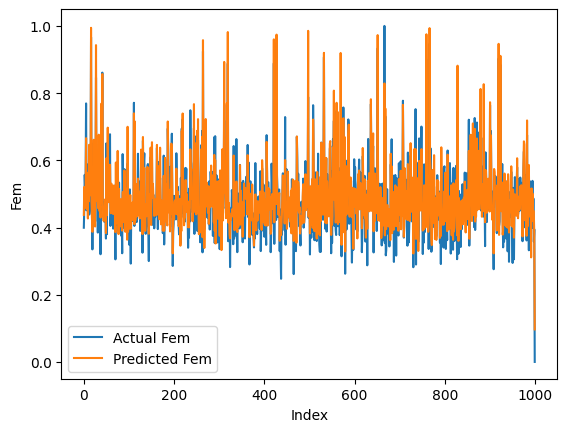

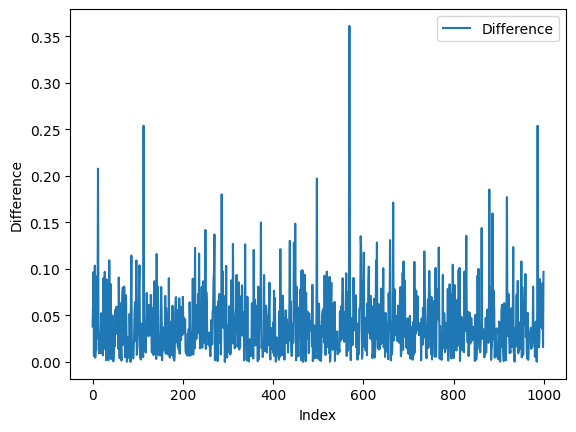

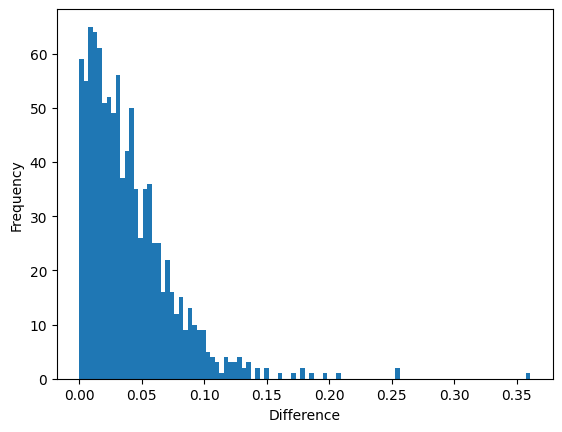

In [15]:
import matplotlib.pyplot as plt
#176
file_pattern = "../ssh_data/*_ready.root"
file_path = glob.glob(file_pattern)[937:937+1][0]
# print(glob.glob("../ssh_data/*_ready.root")[90:947])

# plt.plot(x_index, energies_true[100:200], label='Actual energy')
# plt.plot(x_index[100:200], y_ccn_output_energy[100:200], label='Predicted energy')
# plt.xlabel('Index')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()

plt.plot(x_index, y_actual_fem, label='Actual Fem')
plt.plot(x_index, y_cnn_output_fem, label='Predicted Fem')

plt.xlabel('Index')
plt.ylabel('Fem')
plt.legend()
plt.show()

plt.plot(x_index, y_delta_fem, label='Difference')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.legend()
plt.show()
plt.hist(y_delta_fem, bins=100)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# signal_energy_calibration = lambda signal: 55.4933 * signal - 1.26208

# e_h = 3

# responce_convertor = lambda fem, responce_hadron: e_h/(1 + fem * (e_h-1)) * responce_hadron
# pairs = list(zip(y_actual_fem,energies_meas))

# normilized_energies = [signal_energy_calibration(responce_convertor(*entry)) for entry in pairs]
# print(normilized_energies)
# # plt.plot(x_index[100:200], energies_meas[100:200], label="Energy sum")
# plt.plot(x_index, energies_true)
# plt.plot(x_index, normilized_energies)
# plt.xlabel('Index')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()

# make dependence of fem on energy